Mastercamp TD project

Import all libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import geopandas as gpd

Get Database



In [4]:
data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=100000,sep="|",decimal=","))
data=data.drop(["Identifiant de document","Reference document","1 Articles CGI","2 Articles CGI","3 Articles CGI","4 Articles CGI","5 Articles CGI","Identifiant local","Type de voie","Voie","B/T/Q","Code voie","Code postal","Commune","No voie","Type local"],axis=1)
same=data.head(3)
diff=data.head(5)
print(data.head(1))

   No disposition Date mutation Nature mutation  Valeur fonciere  \
0               1    05/01/2023           Vente        1070000.0   

   Code departement  Code commune  Prefixe de section Section  No plan  \
0                 1           354                 NaN      BD      334   

   No Volume  ... Surface Carrez du 4eme lot  5eme lot  \
0        NaN  ...                        NaN       NaN   

  Surface Carrez du 5eme lot  Nombre de lots  Code type local  \
0                        NaN               1              3.0   

   Surface reelle bati  Nombre pieces principales  Nature culture  \
0                  0.0                        0.0             NaN   

   Nature culture speciale  Surface terrain  
0                      NaN              NaN  

[1 rows x 27 columns]


C:\Users\nico9\AppData\Local\Temp\ipykernel_20272\687114383.py:1: DtypeWarning: Columns (24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=100000,sep="|",decimal=","))


In [5]:
def compare_column_values(df):
    comparison_result = {}
    for column in df.columns:
        if df[column].nunique() == 1:
            comparison_result[column] = 'Same'
        else:
            comparison_result[column] = 'Different'
    return comparison_result

# Compare the values in the selected subset
comparison_result = compare_column_values(same)
print(comparison_result)
print(compare_column_values(diff))

{'No disposition': 'Same', 'Date mutation': 'Same', 'Nature mutation': 'Same', 'Valeur fonciere': 'Same', 'Code departement': 'Same', 'Code commune': 'Same', 'Prefixe de section': 'Different', 'Section': 'Same', 'No plan': 'Different', 'No Volume': 'Different', '1er lot': 'Different', 'Surface Carrez du 1er lot': 'Different', '2eme lot': 'Different', 'Surface Carrez du 2eme lot': 'Different', '3eme lot': 'Different', 'Surface Carrez du 3eme lot': 'Different', '4eme lot': 'Different', 'Surface Carrez du 4eme lot': 'Different', '5eme lot': 'Different', 'Surface Carrez du 5eme lot': 'Different', 'Nombre de lots': 'Same', 'Code type local': 'Different', 'Surface reelle bati': 'Different', 'Nombre pieces principales': 'Different', 'Nature culture': 'Different', 'Nature culture speciale': 'Different', 'Surface terrain': 'Different'}
{'No disposition': 'Same', 'Date mutation': 'Different', 'Nature mutation': 'Same', 'Valeur fonciere': 'Different', 'Code departement': 'Same', 'Code commune': '

Les types des datas

In [6]:
print(data.dtypes)

No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
Code departement                int64
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                     float64
1er lot                        object
Surface Carrez du 1er lot     float64
2eme lot                       object
Surface Carrez du 2eme lot    float64
3eme lot                      float64
Surface Carrez du 3eme lot    float64
4eme lot                      float64
Surface Carrez du 4eme lot    float64
5eme lot                      float64
Surface Carrez du 5eme lot    float64
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Nature culture speciale        object
Surface terr

In [14]:
desired_id="1354BD05/01/2023"
transaction_info = aggregated_data[aggregated_data['Id'] == desired_id]

# Display the information of the transaction
print(transaction_info)

      Code departement Code commune Prefixe de section Section Date mutation  \
10967                1          354                         BD    05/01/2023   

       Valeur fonciere  Surface_combined  Code type local                Id  
10967        1070000.0               0.0              2.0  1354BD05/01/2023  


In [9]:


desired_id="12AC09/01/2023"
code_departement="1"
code_commune="2"
Section="AC"
Date_mutation="09/01/2023"
transaction_info = data[data['Code departement'] == int(code_departement)]
transaction_info = transaction_info[transaction_info['Code commune'] == int(code_commune)]
transaction_info = transaction_info[transaction_info['Section'] == Section]
transaction_info = transaction_info[transaction_info['Date mutation'] == Date_mutation]

#transaction_info = data[data['Code commune'] == int(code_commune)]

print(transaction_info)



     No disposition Date mutation Nature mutation  Valeur fonciere  \
369               1    09/01/2023           Vente           1000.0   

     Code departement  Code commune  Prefixe de section Section  No plan  \
369                 1             2                 NaN      AC      490   

     No Volume  ... Surface Carrez du 4eme lot  5eme lot  \
369        NaN  ...                        NaN       NaN   

    Surface Carrez du 5eme lot  Nombre de lots  Code type local  \
369                        NaN               0              NaN   

     Surface reelle bati  Nombre pieces principales  Nature culture  \
369                  NaN                        NaN               P   

     Nature culture speciale  Surface terrain  
369                      NaN           2950.0  

[1 rows x 27 columns]


In [10]:
# Replace NaN values with empty strings for string columns
data['Code departement'] = data['Code departement'].fillna('')
data['Code commune'] = data['Code commune'].fillna('')
data['Prefixe de section'] = data['Prefixe de section'].fillna('')
data['Section'] = data['Section'].fillna('')
data['Date mutation'] = data['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
data['Surface terrain'] = data['Surface terrain'].astype(float)
data['Surface reelle bati'] = data['Surface reelle bati'].astype(float)

# Calculate combined surface
data['Surface_combined'] = data['Surface terrain'] + data['Surface reelle bati']

# Group by relevant columns and aggregate the data
aggregated_data = data.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']).agg({
    'Valeur fonciere': 'mean',
    'Surface_combined': 'sum',
    'Code type local': 'min'  
}).reset_index()

# Convert aggregated columns to appropriate data types
aggregated_data['Code departement'] = aggregated_data['Code departement'].astype(str)
aggregated_data['Code commune'] = aggregated_data['Code commune'].astype(str)
aggregated_data['Prefixe de section'] = aggregated_data['Prefixe de section'].astype(str)
aggregated_data['Section'] = aggregated_data['Section'].astype(str)
aggregated_data['Date mutation'] = aggregated_data['Date mutation'].astype(str)

# Calculate Id
aggregated_data['Id'] = aggregated_data['Code departement'] + aggregated_data['Code commune'] + aggregated_data['Prefixe de section'] + aggregated_data['Section'] + aggregated_data['Date mutation']

# Print the first few rows to verify the result
print(aggregated_data.head())

  Code departement Code commune Prefixe de section Section Date mutation  \
0                1            1                          A    13/11/2023   
1                1            1                          A    29/11/2023   
2                1            1                          A    31/08/2023   
3                1            1                         ZC    01/12/2023   
4                1            1                         ZH    07/06/2023   

   Valeur fonciere  Surface_combined  Code type local              Id  
0         420000.0            4755.0              1.0   11A13/11/2023  
1         195000.0               0.0              NaN   11A29/11/2023  
2           3050.0               0.0              NaN   11A31/08/2023  
3         155000.0            5540.0              1.0  11ZC01/12/2023  
4         210000.0            1057.0              1.0  11ZH07/06/2023  


In [11]:


# Convert necessary columns to appropriate data types

data['Valeur fonciere'] = data['Valeur fonciere'].astype(float)
data['Surface terrain'] = data['Surface terrain'].astype(float)
data['Surface reelle bati'] = data['Surface reelle bati'].astype(float)

# Calculate combined surface
data['Surface_combined'] = data['Surface terrain'] + data['Surface reelle bati']

# Group by type and calculate average value
average_values_by_type = data.groupby('Code type local')['Valeur fonciere'].mean()

print(average_values_by_type)



Code type local
1.0    200472.323667
2.0    227923.544511
3.0    202089.704088
4.0    461668.389799
Name: Valeur fonciere, dtype: float64


In [12]:
# Convert necessary columns to appropriate data types

aggregated_data['Valeur fonciere'] = aggregated_data['Valeur fonciere'].astype(float)


# Group by type and calculate average value
average_values_by_departement = aggregated_data.groupby('Code departement')['Valeur fonciere'].mean()

print(average_values_by_departement)

Code departement
1    227904.802932
2    121465.017060
3     96865.585903
Name: Valeur fonciere, dtype: float64


Interprétations et visualisations 


In [24]:
data['Prix_m2'] = data['Valeur fonciere'] / data['Surface_combined']

In [25]:
avg_price_per_department = data.groupby('Code departement')['Prix_m2'].mean().reset_index()

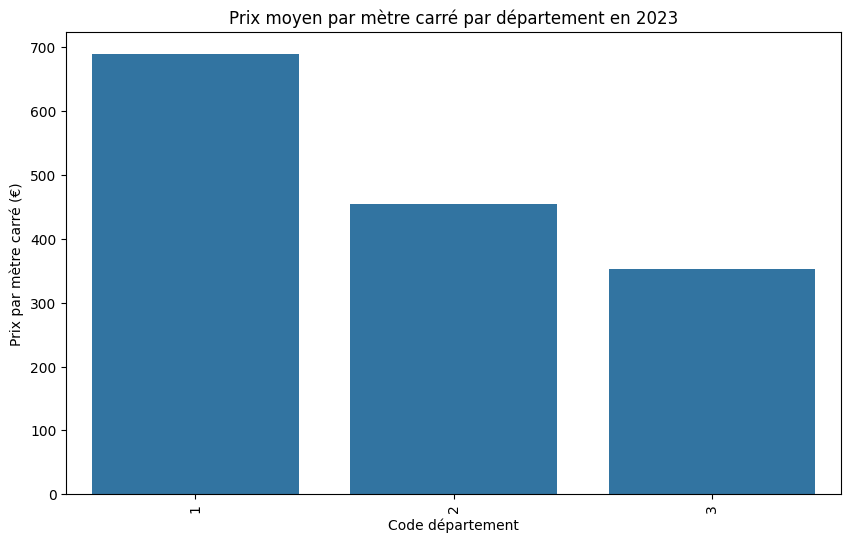

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Code departement', y='Prix_m2', data=avg_price_per_department)
plt.title('Prix moyen par mètre carré par département en 2023')
plt.xlabel('Code département')
plt.ylabel('Prix par mètre carré (€)')
plt.xticks(rotation=90)
plt.show()



Prix moyen par type de propriété


In [27]:
avg_price_by_type = data.groupby('Code type local')['Prix_m2'].mean().reset_index()

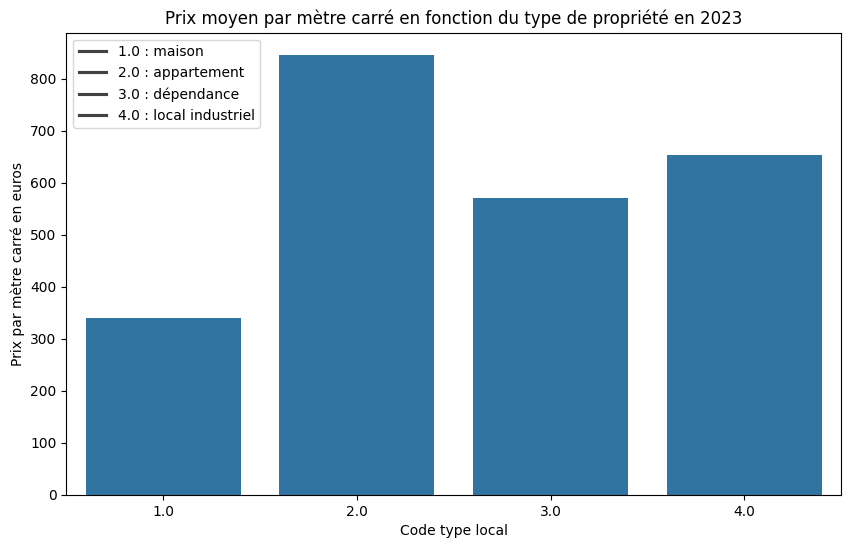

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Code type local', y='Prix_m2', data=avg_price_by_type)
plt.title('Prix moyen par mètre carré en fonction du type de propriété en 2023')
plt.xlabel('Code type local')
plt.ylabel('Prix par mètre carré en euros')
plt.legend(['1.0 : maison',
           '2.0 : appartement',
           '3.0 : dépendance',
           '4.0 : local industriel'], loc = "upper left")
plt.show()